In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Activation
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from EC_Func.metric_plot import plot_confusion_matrix

Using TensorFlow backend.


In [2]:
data, label = make_blobs(n_samples=10000, centers=5, n_features=15, random_state=0)

In [3]:
X_train, X_test, y_train_int, y_test_int = train_test_split(data, label, test_size=0.33, random_state=42)
y_train = to_categorical(y_train_int, 5)
y_test = to_categorical(y_test_int, 5)
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [4]:
def build_model(input_shape = 15):
    model = Sequential()
    model.add(Dense(10, activation = 'relu', kernel_initializer='he_normal', input_shape=(input_shape,)))
    model.add(Dense(8, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(6, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(5, activation = None, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    sgd = optimizers.Adam()
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

print('--------------- fit model -----------------')
model.fit(X_train, y_train,
              batch_size=2048,
              epochs=50,
              validation_data=(X_test, y_test),
              shuffle=True, verbose = 0)

pred = model.predict_classes(X_test)
print(confusion_matrix(np.argmax(y_test, axis = 1), pred))
print(accuracy_score(np.argmax(y_test, axis = 1), pred))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 35        
_________________________________________________________________
activation_1 (Activation)    (None, 5)                 0         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
--------------- fit model -----------------
[[683   0   0   0   0]
 [  0 671   0   0   0]
 [  0   0 661   0   0]
 [  0   0   0 645   0]
 [ 

# Example - select 4 layers

In [5]:
from EC_Func.EC_Classifier_Ball_Tree import EpistemicClassifier
print(X_train.shape)
print(y_train_int.shape, y_train_int)

layer_interest = [0,1,2,3]
EC = EpistemicClassifier(model, layer_interest, metric = 'minkowski', p = 2)
EC.fit(X_train, y_train_int)

(6700, 15)
(6700,) [4 3 0 ... 4 0 3]
Using metric: minkowski
caching hiddens
layer selected: 
dense_1
dense_2
dense_3
dense_4
using Ball Tree for NN Search
building tree for layer 0
building tree for layer 1
building tree for layer 2
building tree for layer 3


# Confusion matrix: I know, I Might Know, I Don't Know

# Predict by number of neighbor

number of neighbor for each layer:  [5, 2, 2, 2]
M1:  1.0
M2:  0.999999999999697
M3:  0.0
M4:  0.0
M5:  0.0


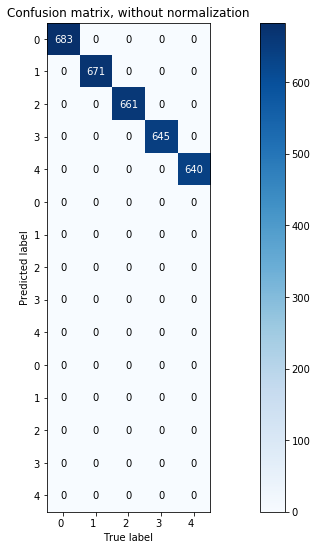

 --------------------------------- 
number of neighbor for each layer:  [10, 4, 4, 4]
M1:  0.9996969696969698
M2:  0.9999999999996969
M3:  0.9999999989999999
M4:  0.00030303030303030303
M5:  0.0


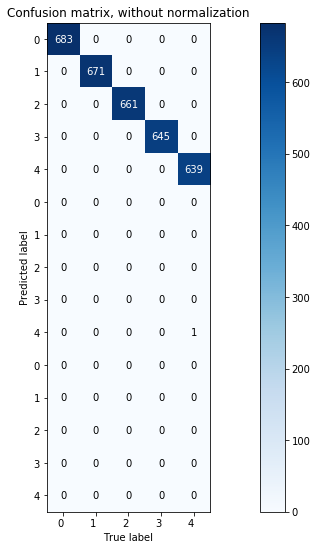

 --------------------------------- 
number of neighbor for each layer:  [15, 6, 6, 6]
M1:  0.9996969696969698
M2:  0.9999999999996969
M3:  0.9999999989999999
M4:  0.00030303030303030303
M5:  0.0


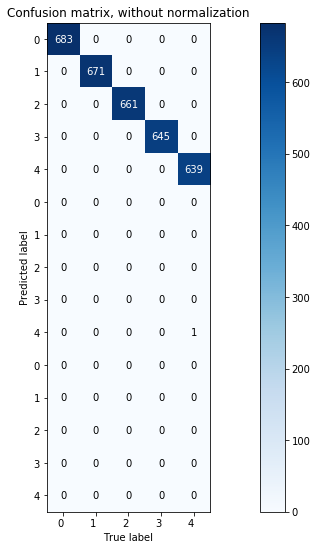

 --------------------------------- 
number of neighbor for each layer:  [20, 8, 8, 8]
M1:  0.9993939393939394
M2:  0.9999999999996968
M3:  0.9999999995
M4:  0.0006060606060606061
M5:  0.0


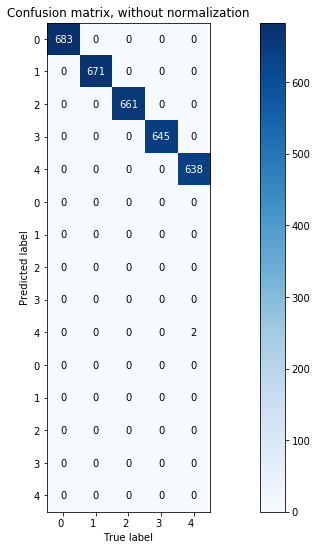

 --------------------------------- 
number of neighbor for each layer:  [25, 10, 10, 10]
M1:  0.9993939393939394
M2:  0.9999999999996968
M3:  0.9999999995
M4:  0.0006060606060606061
M5:  0.0


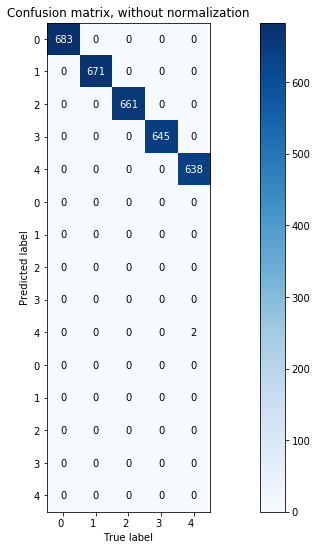

 --------------------------------- 
number of neighbor for each layer:  [30, 12, 12, 12]
M1:  0.9993939393939394
M2:  0.9999999999996968
M3:  0.9999999995
M4:  0.0006060606060606061
M5:  0.0


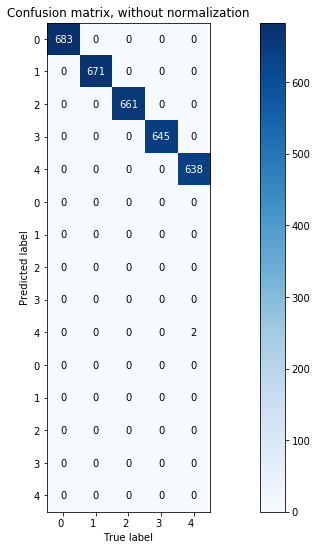

 --------------------------------- 
number of neighbor for each layer:  [35, 14, 14, 14]
M1:  0.9993939393939394
M2:  0.9999999999996968
M3:  0.9999999995
M4:  0.0006060606060606061
M5:  0.0


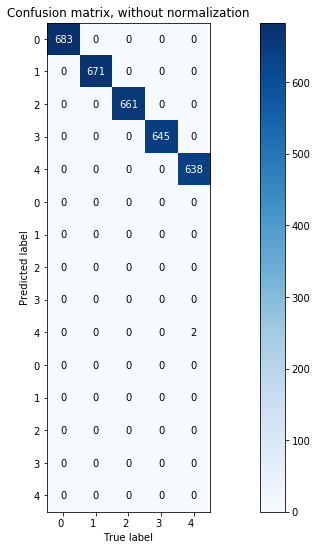

 --------------------------------- 
number of neighbor for each layer:  [40, 16, 16, 16]
M1:  0.9993939393939394
M2:  0.9999999999996968
M3:  0.9999999995
M4:  0.0006060606060606061
M5:  0.0


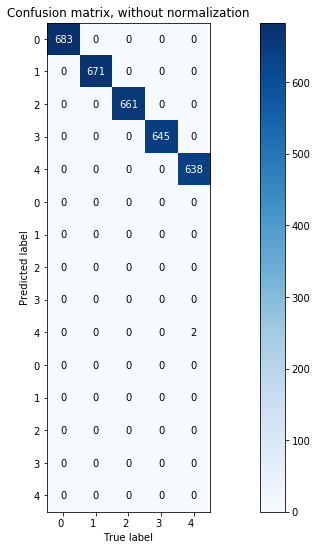

 --------------------------------- 
number of neighbor for each layer:  [45, 18, 18, 18]
M1:  0.9990909090909091
M2:  0.9999999999996967
M3:  0.9999999996666666
M4:  0.0009090909090909091
M5:  0.0


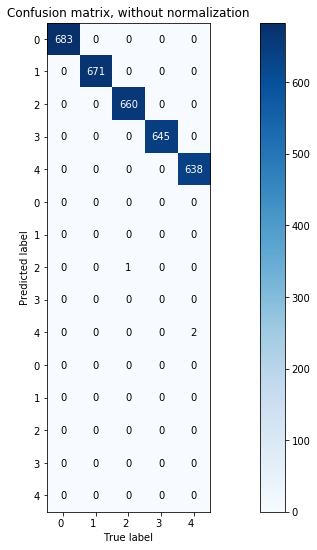

 --------------------------------- 


In [6]:
for i in range(1, 10):
    print('number of neighbor for each layer: ',[5*i, 2*i, 2*i, 2*i])
    pred = EC.predict_class(X_test, n_neigh = [5*i, 4*i, 3*i, 2*i])
    plot_confusion_matrix(y_test_int, pred,  model.predict_classes(X_test))
    print(' --------------------------------- ')

M1:  1.0
M2:  0.999999999999697
M3:  0.0
M4:  0.0
M5:  0.0


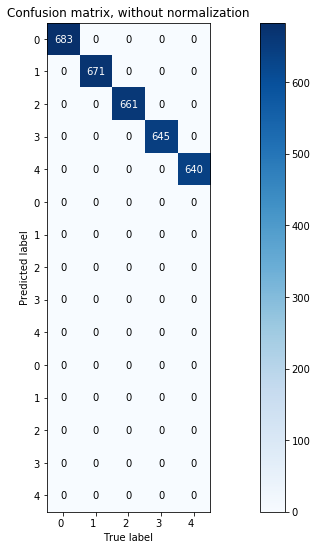

In [7]:
pred = EC.predict_class(X_test, n_neigh = 3)
plot_confusion_matrix(y_test_int, pred,  model.predict_classes(X_test))

# Predict by layer-wise epi distance

Epsilon for each layer: [0.03125, 0.0625, 0.125, 0.25]
M1:  0.14454545454545453
M2:  0.9999999999979036
M3:  0.0
M4:  0.0
M5:  0.8554545454545455


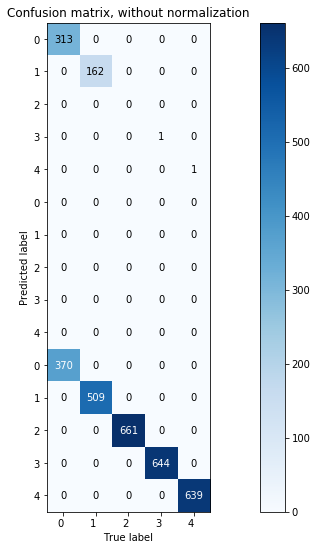

----------------------
Epsilon for each layer: [0.0625, 0.125, 0.25, 0.5]
M1:  0.3321212121212121
M2:  0.9999999999990876
M3:  0.0
M4:  0.0
M5:  0.6678787878787878


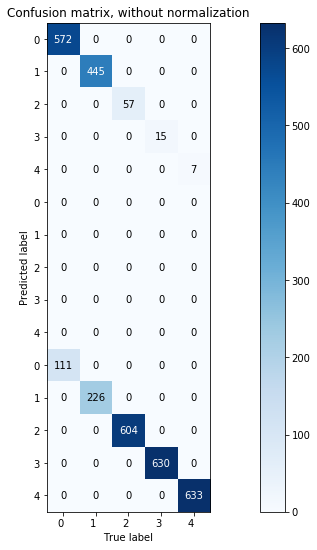

----------------------
Epsilon for each layer: [0.125, 0.25, 0.5, 1.0]
M1:  0.543939393939394
M2:  0.9999999999994429
M3:  0.0
M4:  0.0
M5:  0.45606060606060606


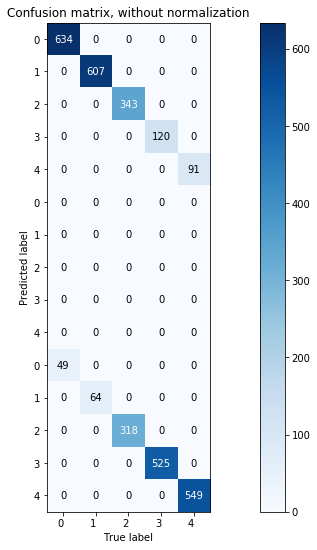

----------------------
Epsilon for each layer: [0.25, 0.5, 1.0, 2.0]
M1:  0.8333333333333334
M2:  0.9999999999996364
M3:  0.0
M4:  0.0
M5:  0.16666666666666666


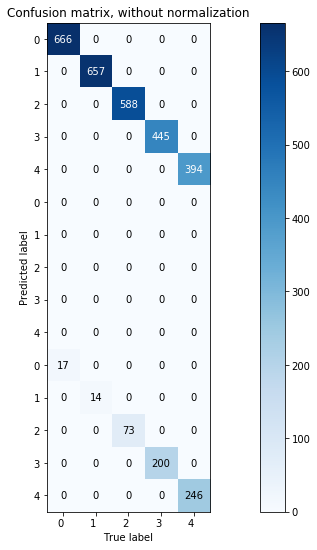

----------------------
Epsilon for each layer: [0.5, 1.0, 2.0, 4.0]
M1:  0.9648484848484848
M2:  0.9999999999996859
M3:  0.9999999999230769
M4:  0.00393939393939394
M5:  0.031212121212121212
M6:  7.923076922467455


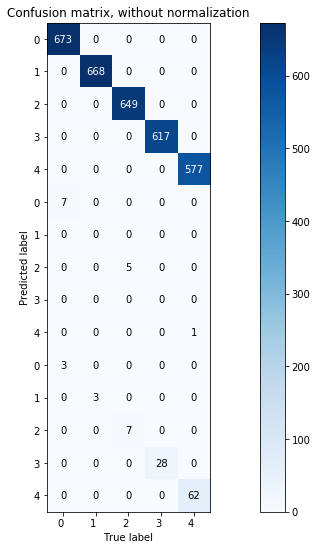

----------------------
Epsilon for each layer: [1, 2, 4, 8]
M1:  0.20242424242424242
M2:  0.999999999998503
M3:  0.9999999999996186
M4:  0.7945454545454546
M5:  0.0030303030303030303
M6:  0.003813882532416547


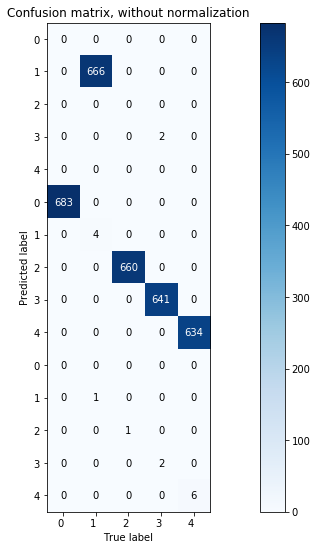

----------------------
Epsilon for each layer: [2, 4, 8, 16]
M1:  0.0
M2:  0.0
M3:  0.9999999999996969
M4:  0.9996969696969698
M5:  0.00030303030303030303
M6:  0.0003031221582296747


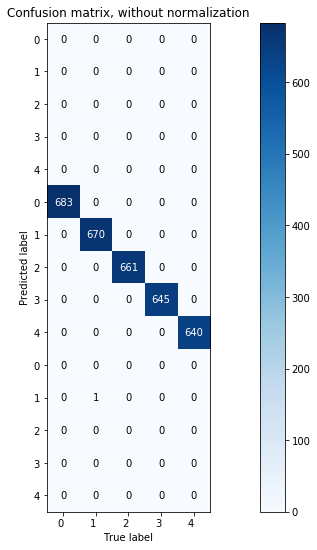

----------------------
Epsilon for each layer: [4, 8, 16, 32]
M1:  0.0
M2:  0.0
M3:  0.999999999999697
M4:  1.0
M5:  0.0


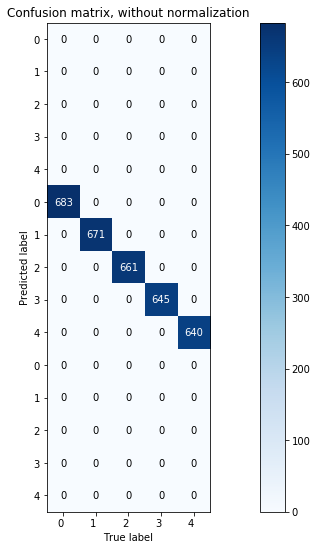

----------------------


In [8]:
for i in range(-5, 3):
    print('Epsilon for each layer:', [2**i, 2*2**i, 4*2**i, 8*2**i])
    pred = EC.predict_class(X_test, dist = [4*2**i, 2*2**i, 1/2*2**i, 1/4*2**i]) # list represent epi in each layer
    plot_confusion_matrix(y_test_int, pred,  model.predict_classes(X_test))
    print('----------------------')

# Adaptive ball without discount

Epsilon ball for input layer: 0.1
adaptive distance in each layer [0.23115555084314507, 0.39640843609164594, 0.5577611338021816, 0.7766396657981908]
M1:  0.8542424242424242
M2:  0.9999999999996453
M3:  0.9999999999
M4:  0.0030303030303030303
M5:  0.14272727272727273
M6:  47.09999999529


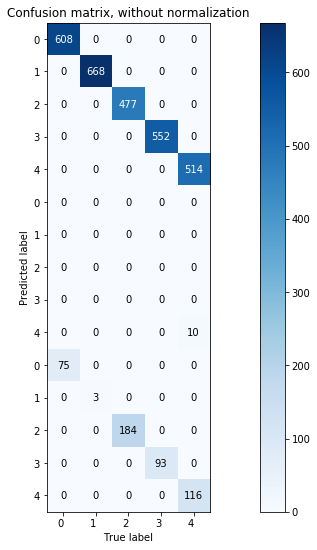

----------------------
Epsilon ball for input layer: 0.2
adaptive distance in each layer [0.46231110168629014, 0.7928168721832919, 1.1155222676043632, 1.5532793315963815]
M1:  0.7912121212121213
M2:  0.999999999999617
M3:  0.999999999998512
M4:  0.20363636363636364
M5:  0.005151515151515152
M6:  0.025297619047581404


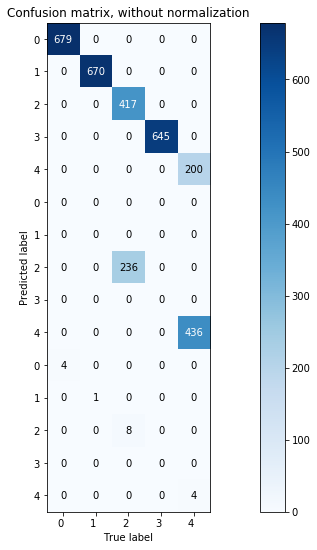

----------------------
Epsilon ball for input layer: 0.30000000000000004
adaptive distance in each layer [0.6934666525294353, 1.189225308274938, 1.673283401406545, 2.3299189973945724]
M1:  0.6127272727272727
M2:  0.9999999999995054
M3:  0.999999999999217
M4:  0.38696969696969696
M5:  0.00030303030303030303
M6:  0.0007830853563032239


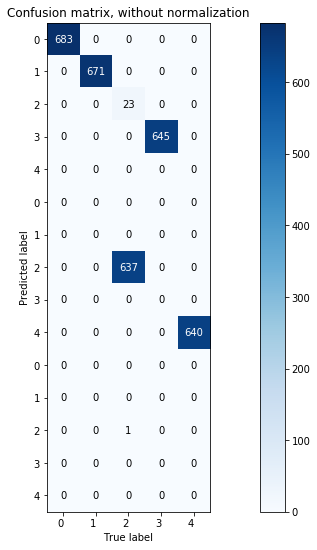

----------------------
Epsilon ball for input layer: 0.4
adaptive distance in each layer [0.9246222033725803, 1.5856337443665838, 2.2310445352087265, 3.106558663192763]
M1:  0.6057575757575757
M2:  0.9999999999994997
M3:  0.9999999999992314
M4:  0.3942424242424242
M5:  0.0


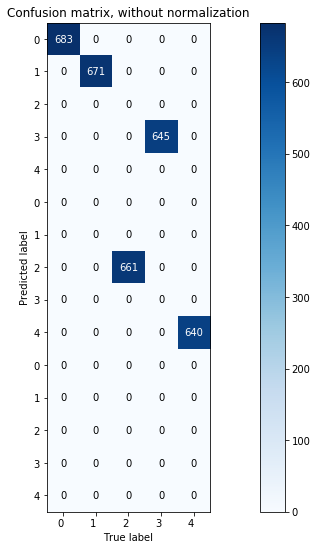

----------------------
Epsilon ball for input layer: 0.5
adaptive distance in each layer [1.1557777542157253, 1.9820421804582296, 2.788805669010908, 3.8831983289909537]
M1:  0.5584848484848485
M2:  0.9999999999994574
M3:  0.9999999999993137
M4:  0.4415151515151515
M5:  0.0


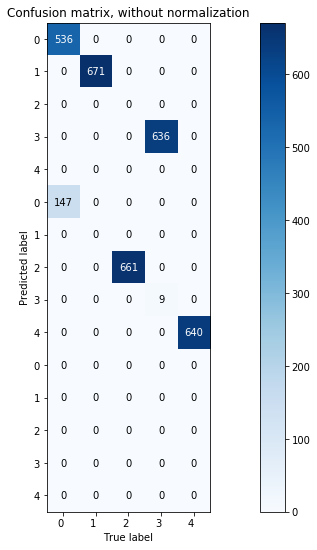

----------------------
Epsilon ball for input layer: 0.6000000000000001
adaptive distance in each layer [1.3869333050588706, 2.378450616549876, 3.34656680281309, 4.659837994789145]
M1:  0.3418181818181818
M2:  0.9999999999991135
M3:  0.9999999999995396
M4:  0.6581818181818182
M5:  0.0


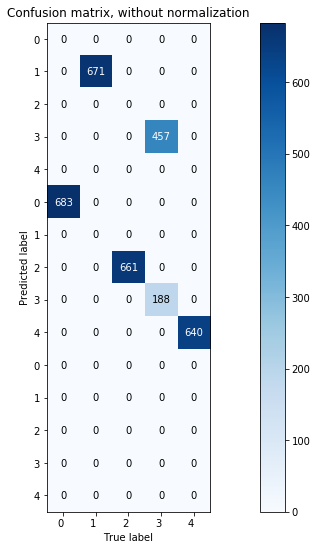

----------------------
Epsilon ball for input layer: 0.7000000000000001
adaptive distance in each layer [1.6180888559020155, 2.7748590526415216, 3.9043279366152714, 5.436477660587336]
M1:  0.2396969696969697
M2:  0.9999999999987358
M3:  0.9999999999996014
M4:  0.7603030303030303
M5:  0.0


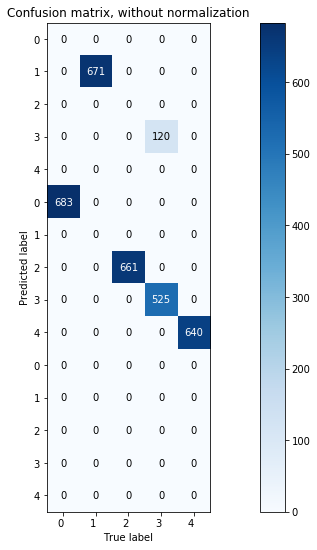

----------------------
Epsilon ball for input layer: 0.8
adaptive distance in each layer [1.8492444067451606, 3.1712674887331675, 4.462089070417453, 6.213117326385526]
M1:  0.1990909090909091
M2:  0.999999999998478
M3:  0.9999999999996216
M4:  0.8009090909090909
M5:  0.0


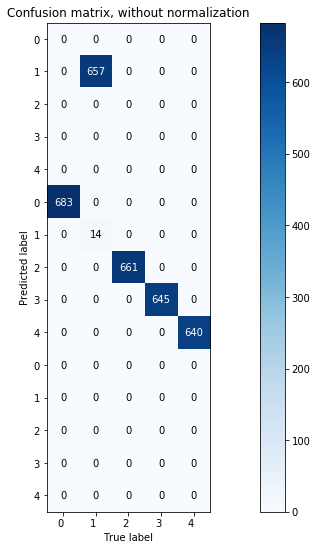

----------------------
Epsilon ball for input layer: 0.9
adaptive distance in each layer [2.0803999575883054, 3.567675924824813, 5.019850204219635, 6.989756992183717]
M1:  0.15424242424242424
M2:  0.9999999999980353
M3:  0.9999999999996417
M4:  0.8457575757575757
M5:  0.0


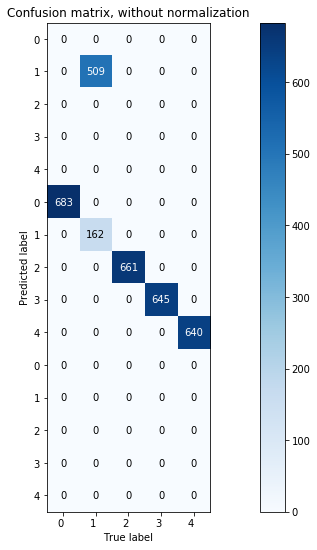

----------------------


In [9]:
for i in range(1, 10):
    print('Epsilon ball for input layer:', 0.1*i)
    pred = EC.predict_class(X_test, adaptive_ball = True, discount_radius = None, epsilon = 0.1*i) 
    plot_confusion_matrix(y_test_int, pred,  model.predict_classes(X_test))
    print('----------------------')